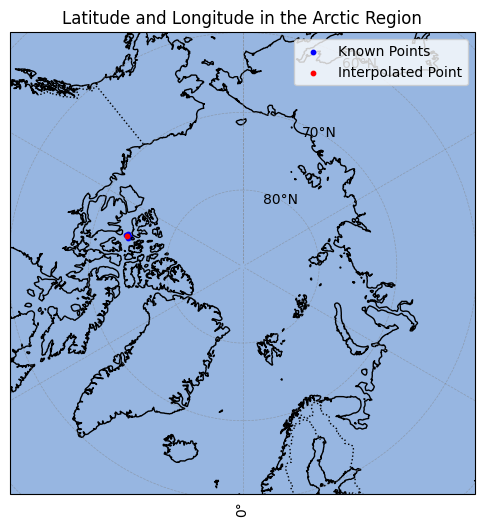

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example Data (Known Points)
x_known = [253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337]
y_known = [74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753]
z_known = [0.04222093679422526, 0.02939444349332336, 0.02361927128232367, 0.02457275269829678]

# Interpolated point
interpolated_point = (255.070312500000, 74.4735717773438)

# Convert x_known and interpolated_point to longitude (degrees east)
x_known_lon = np.array(x_known) - 360 if max(x_known) > 180 else x_known
interpolated_point_lon = interpolated_point[0] - 360 if interpolated_point[0] > 180 else interpolated_point[0]

# Plot on an Arctic projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())  # Focus on the Arctic region

# Add geographic features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot known points
ax.scatter(x_known_lon, y_known, color='blue', s=10, transform=ccrs.PlateCarree(), label="Known Points")

# Plot interpolated point
ax.scatter(interpolated_point_lon, interpolated_point[1], color='red', s=10, transform=ccrs.PlateCarree(), label="Interpolated Point")

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add title and legend
plt.title("Latitude and Longitude in the Arctic Region")
plt.legend()
plt.show()

In [10]:
import plotly.graph_objects as go

# Example Data (Known Points)
x_known = [253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337]
y_known = [74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753]
z_known = [0.04222093679422526, 0.02939444349332336, 0.02361927128232367, 0.02457275269829678]

# Interpolated point
interpolated_point = (255.070312500000, 74.4735717773438)

# Convert x_known and interpolated_point to longitude (degrees east)
x_known_lon = [lon - 360 if lon > 180 else lon for lon in x_known]
interpolated_point_lon = interpolated_point[0] - 360 if interpolated_point[0] > 180 else interpolated_point[0]

# Create the globe
fig = go.Figure()

# Add known points
fig.add_trace(go.Scattergeo(
    lon=x_known_lon,
    lat=y_known,
    mode='markers',
    marker=dict(size=8, color='blue'),
    name='Known Points'
))

# Add lines connecting the known points
fig.add_trace(go.Scattergeo(
    lon=x_known_lon + [x_known_lon[0]],  # Close the loop by adding the first point at the end
    lat=y_known + [y_known[0]],         # Close the loop by adding the first point at the end
    mode='lines',
    line=dict(width=2, color='blue'),
    name='Lines Between Points'
))

# Add interpolated point
fig.add_trace(go.Scattergeo(
    lon=[interpolated_point_lon],
    lat=[interpolated_point[1]],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Interpolated Point'
))

# Update layout for globe projection
fig.update_geos(
    projection_type="orthographic",  # Globe-like projection
    #center=dict(lat=75, lon=-105),  # Center the globe on the Arctic region
    showland=True,
    landcolor="lightgray",
    oceancolor="lightblue",
    showocean=True,
    showcountries=True
)

# Add title
fig.update_layout(
    title="Quad on Globe",
    height=800,  # Set the height of the plot
    margin=dict(l=0, r=0, t=0, b=0)  # Remove all margins to center the globe
)

# Show the plot
fig.show()